In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.metrics import confusion_matrix,auc,roc_auc_score


import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree





#### Load training data

In [54]:
df = pd.read_csv("data/resample_df.csv")
df = df.drop(["Unnamed: 0"],1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,158453.0,2.094561,-0.827280,-1.493206,-0.513444,-0.428918,-0.794959,-0.281462,-0.288319,-0.539413,...,-0.120575,0.051099,0.103849,0.684904,-0.071362,0.761780,-0.080165,-0.049095,65.14,0.0
1,163503.0,1.971197,-0.326286,-1.303626,0.363868,0.099659,-0.301053,-0.024899,-0.091013,0.527642,...,0.191623,0.746659,0.005074,0.860414,0.185236,0.666558,-0.080570,-0.069806,29.61,0.0
2,143201.0,2.031495,-0.269744,-0.536151,0.298784,-0.340236,-0.348439,-0.426236,-0.078201,1.243864,...,-0.218718,-0.446918,0.280030,-0.684374,-0.318016,-0.583326,0.037731,-0.036324,7.99,0.0
3,81865.0,-2.624081,2.153765,0.752903,0.234243,-1.195105,1.798252,-3.797852,-6.979159,-0.908887,...,-3.528764,2.117063,0.327859,0.248706,-0.463584,0.404743,0.207824,0.184777,29.99,0.0
4,80145.0,-0.857634,1.107747,1.063217,1.243953,-0.142669,0.322056,0.146324,0.715638,-0.631533,...,0.066211,0.313025,-0.065624,0.022921,-0.111658,-0.237568,0.292232,0.120861,26.45,0.0


In [55]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [56]:
# Keep a copy of original df
original_df = pd.DataFrame.copy(df)

# data = data.drop("Cabin",axis=1)

In [57]:
y = df.Class
X = df.drop(["Class"], 1)
# All columns have the type: pandas.core.series.Series
X.shape


(396664, 30)

In [84]:
### Load test data

test_df = pd.read_csv("data/test_df.csv")
test_df = test_df.drop(["Unnamed: 0"],1)
test_df.head()

test_df.shape

X_test = test_df.drop("Class",axis=1)
y_test = test_df["Class"]

### Load test data

test_df = pd.read_csv("data/test_df.csv")
test_df = test_df.drop(["Unnamed: 0"],1)
test_df.head()

X_test = test_df.drop("Class",axis=1)
y_test = test_df["Class"]

test_df.shape

from sklearn.model_selection import train_test_split

X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Load test data

In [64]:
test_df = pd.read_csv("data/test_df.csv")
test_df = test_df.drop(["Unnamed: 0"],1)
test_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,30835.0,-1.018498,0.744531,0.289542,-1.663337,2.712754,3.241013,0.203945,0.913807,-0.526414,...,-0.302353,-1.059262,-0.226894,0.983172,0.414469,0.042577,0.122690,0.106860,11.48,0.0
1,152802.0,-0.900580,0.891764,-0.164772,-2.747692,0.661651,-0.700355,0.715725,0.491749,0.013460,...,-0.278982,-0.997169,-0.197361,-1.142360,-0.018586,0.427324,0.084666,0.076225,1.00,0.0
2,63472.0,1.130919,-0.505928,0.991684,0.081318,-1.001127,0.140730,-0.712661,0.207641,0.947068,...,-0.183368,-0.367756,-0.001624,0.094860,0.142414,0.941288,-0.043167,0.006645,40.00,0.0
3,66308.0,-0.699577,1.460116,1.923298,2.312012,0.818635,-0.233088,1.434028,-0.826070,-0.907385,...,-0.005894,0.495503,-0.151214,0.626689,-0.392862,-0.046345,-0.665038,-0.421599,0.90,0.0
4,123361.0,0.539546,-3.280004,-0.977889,0.374056,-2.035271,-0.354218,0.198069,-0.224371,-0.409342,...,-0.228509,-1.776949,-0.055427,0.477291,-1.126123,0.014392,-0.159133,0.087782,776.29,0.0


In [65]:
test_df.shape

(85443, 31)

In [66]:
X_test = test_df.drop("Class",axis=1)
y_test = test_df["Class"]

In [69]:
### Load test data

test_df = pd.read_csv("data/test_df.csv")
test_df = test_df.drop(["Unnamed: 0"],1)
test_df.head()

X_test = test_df.drop("Class",axis=1)
y_test = test_df["Class"]

In [70]:
test_df.shape



(85443, 31)

### Define helper functions

In [95]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [100]:
precision, recall, threasholds = precision_recall_curve(y_test, y_pred)

In [101]:
auc(recall, precision, reorder=True)

0.50657152479735068

### Random Forest

### XGBoost Basic

In [35]:
from xgboost import XGBClassifier
# fit model no training data

bst = XGBClassifier()
bst.fit(X_sub_train, y_sub_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [21]:
bst.score(X_test,y_test)

0.99054615493213405

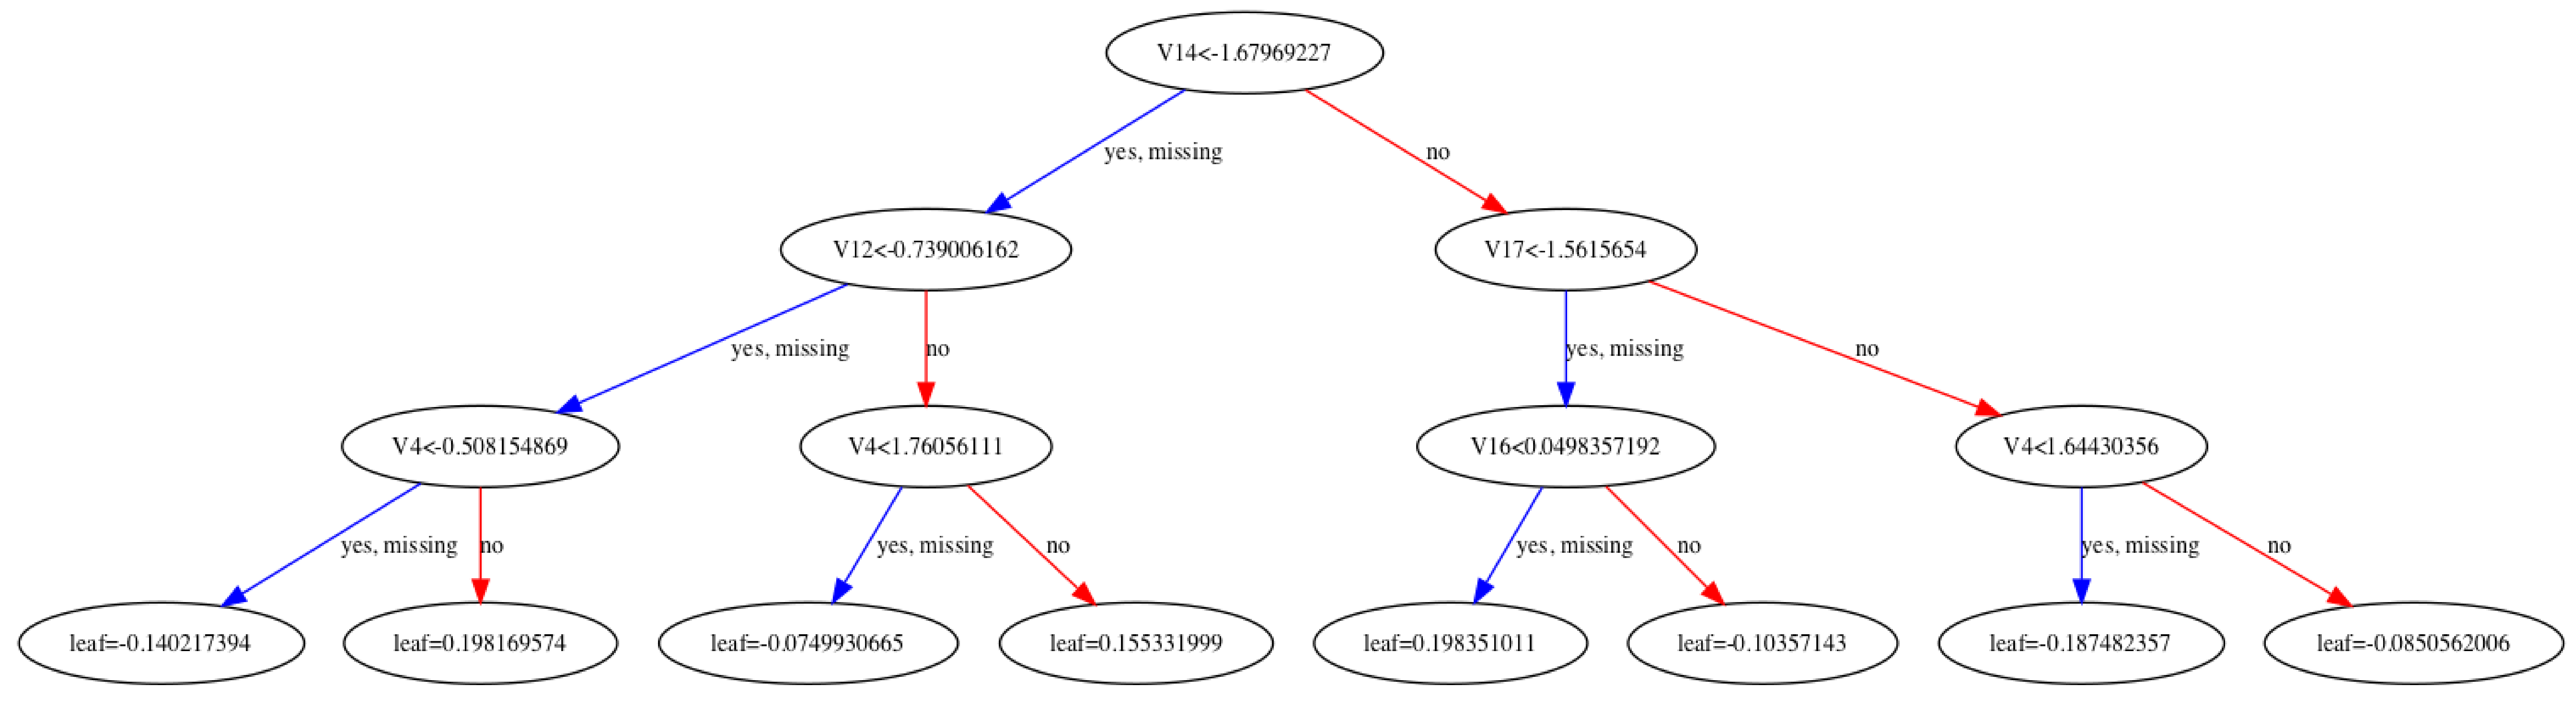

In [36]:
from xgboost import plot_tree

plot_tree(bst)
fig = plt.gcf()
fig.set_size_inches(150, 100)

### XGBoost with Gridsearch Hypertuning and Cross Validation

In [11]:
# And build a training pipeline with a small amount of hyper-parameter testing

pipeline = Pipeline([('imputer', Imputer(strategy='median')), ('model', XGBClassifier())])
 
parameters = dict(model__max_depth=[3, 5, 7],
                  model__learning_rate=[.01, .1],
                  model__n_estimators=[100, 500])

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_sub, y_sub)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_chil...
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'model__max_depth': [3, 5, 7], 'model__learning_rate': [0.01, 0.1], 'model__n_estimators': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [96]:
import pickle
filename = 'XGBoost_cv_model.sav'
pickle.dump(cv, open(filename, 'wb'))

NameError: name 'cv' is not defined

In [34]:
loaded_cv_model = pickle.load(open(filename, 'rb'))

#### Make predictions on sub test set

In [62]:
test_predictions = loaded_cv_model.predict(X_sub_test)
print("Test Accuracy: {}".format(accuracy_score(y_sub_test, test_predictions)))

Test Accuracy: 0.9997882338704798


In [63]:
#### Plot confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_sub_test, test_predictions)

array([[99126,    41],
       [    1, 99164]])

In [74]:
## Recall accuracy:
99164/(99165)

0.9999899157969041

#### Make predictions on test set

In [112]:
xgboost_test_pred = loaded_cv_model.predict(X_test)
print("Test Accuracy: {}".format(accuracy_score(y_test, test_predictions)))

Test Accuracy: 0.9992509626300574


In [113]:
#### Plot confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgboost_test_pred)


array([[85241,    44],
       [   20,   138]])

Note that most mistakes are false positives, and result is imbalanced.

However, false negative accounts for 1/3 of the mistakes. This is not a good sign. The risk of each fraud is large. We would want to minimize the #false negatives. Recall accuracy is still below 0.9. 

In [108]:
xgboost_test_score = loaded_cv_model.predict_proba(X_test)

In [73]:
## Recall accuracy:
138/(20+138)

0.8734177215189873

In [114]:
print_scores(y_test, xgboost_test_pred, xgboost_test_score)


test-set confusion matrix:
 [[85241    44]
 [   20   138]]
recall score:  0.873417721519
precision score:  0.758241758242
f1 score:  0.811764705882
accuracy score:  0.99925096263
ROC AUC: 0.9772869893425098


In [120]:
precision, recall, threasholds = precision_recall_curve(y_test, xgboost_test_score[:,1])
average_precision_score(y_test, xgboost_test_score[:,1])

0.86176248773802244

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

# train logistic regression with a subset of the over-sampled data
drop_list = []

clf = LogisticRegression()
clf.fit(X_sub_train, y_sub_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)



In [97]:
print_scores(y_test, y_pred, y_pred_prob)

test-set confusion matrix:
 [[83908  1377]
 [   13   145]]
recall score:  0.917721518987
precision score:  0.0952693823916
f1 score:  0.172619047619
accuracy score:  0.983731844622
ROC AUC: 0.970715983563673


Note that Logistic regression achieves higher recall accuracy, although slightly lower accuracy sscore

In [119]:
precision, recall, threasholds = precision_recall_curve(y_test, y_pred_prob[:,1])
average_precision_score(y_test, y_pred_prob[:,1])

0.77834992081835563

### Interpreting prediction using LIME

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

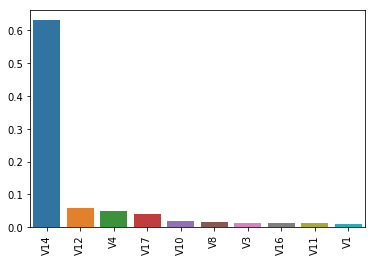

In [45]:
# import lime tools
import lime
import lime.lime_tabular
import operator
import seaborn as sns


#explainer = lime.lime_tabular.LimeTabularExplainer(X_sub.values, class_names=["Non-fraud", "Fraud"], discretize_continuous=True)
#explainer.explain_instance(X_test.values[0], xgb_prediction, num_features=5, top_labels=1)


fi = list(zip(X_sub.columns, loaded_cv_model.best_estimator_.named_steps['model'].feature_importances_))
fi.sort(key = operator.itemgetter(1), reverse=True)
top_10 = fi[:10]
x = [x[0] for x in top_10]
y = [x[1] for x in top_10]

top_10_chart = sns.barplot(x, y)
plt.setp(top_10_chart.get_xticklabels(), rotation=90)

In EDA, we also observe that the distribution of V14 for fraud vs non-fraud data also have signifance differences.


In [46]:
X_sub_imputed = loaded_cv_model.best_estimator_.named_steps['imputer'].transform(X_sub)
explainer = lime.lime_tabular.LimeTabularExplainer(X_sub_imputed, 
    feature_names=X_sub.columns.tolist(),
    class_names=["Non Fraud", "Fraud"],
    discretize_continuous=True)

In [47]:
model = loaded_cv_model.best_estimator_.named_steps['model']
def xgb_prediction(X_array_in):
    if len(X_array_in.shape) < 2:
        X_array_in = np.expand_dims(X_array_in, 0)
    return model.predict_proba(X_array_in)

In [52]:
X_sub_test_imputed = loaded_cv_model.best_estimator_.named_steps['imputer'].transform(X_sub2)
exp = explainer.explain_instance(X_sub_test_imputed[1], xgb_prediction, num_features=5, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)